In [13]:
!git clone https://github.com/rishabh-bhardwaj-64rr/EVA5.git

Cloning into 'EVA5'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 124 (delta 48), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (124/124), 681.46 KiB | 6.08 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
cd EVA5/S7/

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary
from tqdm import tqdm

In [4]:
# importing from the repository
import transform, dataset, dataloader, normalisation, model, loss_functions, trainer, tester, run_model, plot_metrics, misclassifications


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# loading CIFAR10 dataset and applying transformations

train_transforms, test_transforms = transform.cifar10_transforms()
trainset, testset = dataset.cifar10_dataset(train_transforms, test_transforms)
train_loader, test_loader = dataloader.cifar10_dataloader(trainset, testset)

# classes in the data
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA available? True


In [6]:
# device(CPU else CUDA)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [7]:
# model summary
net = model.Cifar10_Net(norm_type='BN').to(device) # moving model to device
print(summary(net, input_size=(3, 32, 32)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
           Dropout-3           [-1, 32, 32, 32]               0
              ReLU-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
       BatchNorm2d-6           [-1, 64, 32, 32]             128
           Dropout-7           [-1, 64, 32, 32]               0
              ReLU-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           2,080
        MaxPool2d-10           [-1, 32, 16, 16]               0
      BatchNorm2d-11           [-1, 32, 16, 16]              64
          Dropout-12           [-1, 32, 16, 16]               0
             ReLU-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

In [8]:
# final evaluation
EPOCHS = 35
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

train_acc = [] # empty lists to store losses and accuracies
train_losses = []
test_acc = []
test_losses = []

# running the model
run_model.evaluation( net, train_loader, test_loader, optimizer, EPOCHS, device,
                    train_acc, train_losses, test_acc, test_losses)

  0%|          | 0/391 [00:00<?, ?it/s]


 Epoch: 1


Loss = 1.5773602724075317 Batch_id = 390 Accuracy = 31.88: 100%|██████████| 391/391 [00:17<00:00, 21.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0149, Accuracy: 3072/10000 (30.72%)


 Epoch: 2


Loss = 1.28995943069458 Batch_id = 390 Accuracy = 46.40: 100%|██████████| 391/391 [00:17<00:00, 21.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 4697/10000 (46.97%)


 Epoch: 3


Loss = 1.0757853984832764 Batch_id = 390 Accuracy = 53.64: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5529/10000 (55.29%)


 Epoch: 4


Loss = 1.1747791767120361 Batch_id = 390 Accuracy = 58.27: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 5771/10000 (57.71%)


 Epoch: 5


Loss = 0.9017178416252136 Batch_id = 390 Accuracy = 61.46: 100%|██████████| 391/391 [00:17<00:00, 21.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6363/10000 (63.63%)


 Epoch: 6


Loss = 1.210325002670288 Batch_id = 390 Accuracy = 64.03: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 6449/10000 (64.49%)


 Epoch: 7


Loss = 1.01338791847229 Batch_id = 390 Accuracy = 66.21: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6511/10000 (65.11%)


 Epoch: 8


Loss = 0.8130167722702026 Batch_id = 390 Accuracy = 67.55: 100%|██████████| 391/391 [00:17<00:00, 21.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6854/10000 (68.54%)


 Epoch: 9


Loss = 0.9459511637687683 Batch_id = 390 Accuracy = 69.53: 100%|██████████| 391/391 [00:17<00:00, 21.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 6681/10000 (66.81%)


 Epoch: 10


Loss = 0.8901370167732239 Batch_id = 390 Accuracy = 70.78: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6891/10000 (68.91%)


 Epoch: 11


Loss = 0.7709861993789673 Batch_id = 390 Accuracy = 72.20: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7213/10000 (72.13%)


 Epoch: 12


Loss = 0.7490301132202148 Batch_id = 390 Accuracy = 73.25: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7132/10000 (71.32%)


 Epoch: 13


Loss = 0.6614786386489868 Batch_id = 390 Accuracy = 74.15: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7378/10000 (73.78%)


 Epoch: 14


Loss = 0.5872038006782532 Batch_id = 390 Accuracy = 75.25: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7333/10000 (73.33%)


 Epoch: 15


Loss = 0.6079832315444946 Batch_id = 390 Accuracy = 76.13: 100%|██████████| 391/391 [00:17<00:00, 21.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7523/10000 (75.23%)


 Epoch: 16


Loss = 0.5269604921340942 Batch_id = 390 Accuracy = 76.80: 100%|██████████| 391/391 [00:17<00:00, 22.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7712/10000 (77.12%)


 Epoch: 17


Loss = 0.6178042888641357 Batch_id = 390 Accuracy = 77.81: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7699/10000 (76.99%)


 Epoch: 18


Loss = 0.5478025674819946 Batch_id = 390 Accuracy = 78.02: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7774/10000 (77.74%)


 Epoch: 19


Loss = 0.6599165797233582 Batch_id = 390 Accuracy = 78.56: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7776/10000 (77.76%)


 Epoch: 20


Loss = 0.7322110533714294 Batch_id = 390 Accuracy = 79.14: 100%|██████████| 391/391 [00:17<00:00, 22.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7868/10000 (78.68%)


 Epoch: 21


Loss = 0.7397705316543579 Batch_id = 390 Accuracy = 79.87: 100%|██████████| 391/391 [00:17<00:00, 22.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7943/10000 (79.43%)


 Epoch: 22


Loss = 0.557403028011322 Batch_id = 390 Accuracy = 80.37: 100%|██████████| 391/391 [00:17<00:00, 22.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7963/10000 (79.63%)


 Epoch: 23


Loss = 0.6268399953842163 Batch_id = 390 Accuracy = 80.83: 100%|██████████| 391/391 [00:17<00:00, 21.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7952/10000 (79.52%)


 Epoch: 24


Loss = 0.5266904830932617 Batch_id = 390 Accuracy = 81.14: 100%|██████████| 391/391 [00:17<00:00, 22.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8018/10000 (80.18%)


 Epoch: 25


Loss = 0.47010716795921326 Batch_id = 390 Accuracy = 81.48: 100%|██████████| 391/391 [00:17<00:00, 21.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7978/10000 (79.78%)


 Epoch: 26


Loss = 0.4652169346809387 Batch_id = 390 Accuracy = 82.08: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8059/10000 (80.59%)


 Epoch: 27


Loss = 0.5380213260650635 Batch_id = 390 Accuracy = 82.33: 100%|██████████| 391/391 [00:17<00:00, 21.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8032/10000 (80.32%)


 Epoch: 28


Loss = 0.4834774434566498 Batch_id = 390 Accuracy = 82.59: 100%|██████████| 391/391 [00:17<00:00, 22.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8166/10000 (81.66%)


 Epoch: 29


Loss = 0.6189842820167542 Batch_id = 390 Accuracy = 83.01: 100%|██████████| 391/391 [00:17<00:00, 22.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8080/10000 (80.80%)


 Epoch: 30


Loss = 0.7194088697433472 Batch_id = 390 Accuracy = 83.30: 100%|██████████| 391/391 [00:17<00:00, 22.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8081/10000 (80.81%)


 Epoch: 31


Loss = 0.5037304162979126 Batch_id = 390 Accuracy = 83.64: 100%|██████████| 391/391 [00:17<00:00, 21.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8164/10000 (81.64%)


 Epoch: 32


Loss = 0.5598341822624207 Batch_id = 390 Accuracy = 83.89: 100%|██████████| 391/391 [00:17<00:00, 22.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8240/10000 (82.40%)


 Epoch: 33


Loss = 0.48985370993614197 Batch_id = 390 Accuracy = 84.10: 100%|██████████| 391/391 [00:17<00:00, 22.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8197/10000 (81.97%)


 Epoch: 34


Loss = 0.41870182752609253 Batch_id = 390 Accuracy = 84.40: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8261/10000 (82.61%)


 Epoch: 35


Loss = 0.5321363806724548 Batch_id = 390 Accuracy = 84.70: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]



Test set: Average loss: 0.0042, Accuracy: 8259/10000 (82.59%)



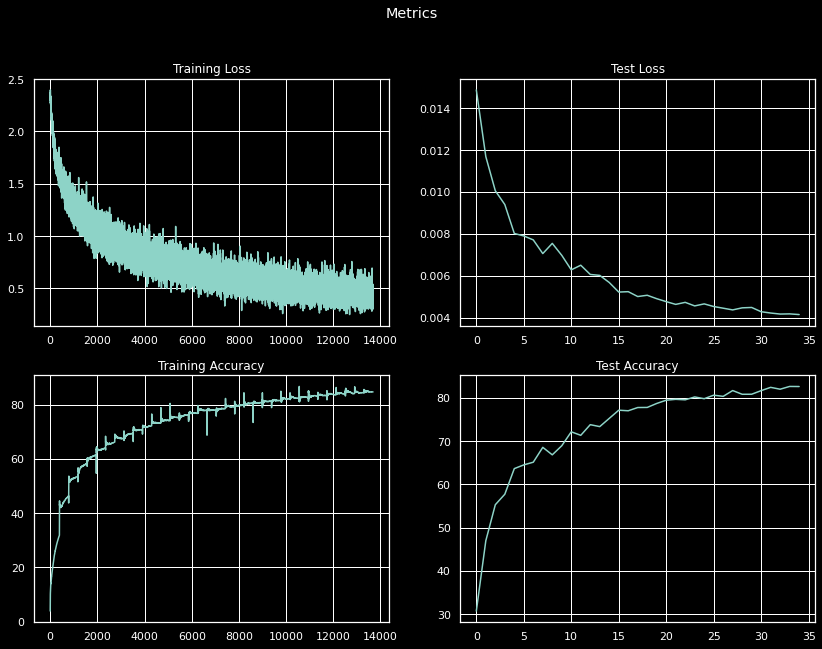

In [9]:
# plotting the model metrics

train_metric = (train_acc, train_losses)
test_metric = (test_acc, test_losses)

plot_metrics.metrics(train_metric, test_metric)

## NUMBER OF EPOCHS = 35
## BEST TRAIN ACCURACY: 84.70%
## BEST TEST ACCURACY: 82.61%

In [15]:
# printing class-wise accuracy
import classwise_accuracy

classwise_accuracy.classwise_accuracy(net, test_loader, device, classes)

Accuracy of plane : 93 %
Accuracy of   car : 85 %
Accuracy of  bird : 75 %
Accuracy of   cat : 67 %
Accuracy of  deer : 90 %
Accuracy of   dog : 75 %
Accuracy of  frog : 97 %
Accuracy of horse : 69 %
Accuracy of  ship : 93 %
Accuracy of truck : 89 %
